In [0]:
# Imports
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data and normalize inputs
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)

(60000, 28, 28)


In [0]:
# Create the model
i = Input(shape=(x_train[0].shape))
x = LSTM(128)(i)
x = Dense(10, activation="softmax")(x)

model = Model(i, x)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [4]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3335 - accuracy: 0.8930 - val_loss: 0.1233 - val_accuracy: 0.9626
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1073 - accuracy: 0.9677 - val_loss: 0.0823 - val_accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0751 - accuracy: 0.9775 - val_loss: 0.0739 - val_accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0567 - accuracy: 0.9825 - val_loss: 0.0581 - val_accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0483 - accuracy: 0.9852 - val_loss: 0.0509 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0577 - val_accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0558 - val_accuracy:

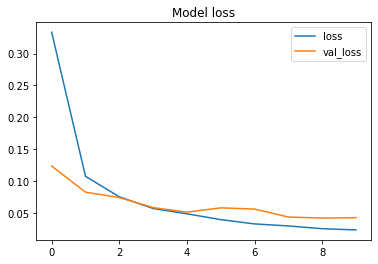

In [5]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.title("Model loss")
plt.legend()
plt.show()

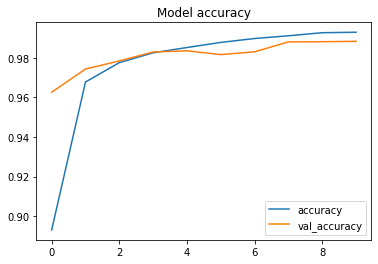

In [6]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.title("Model accuracy")
plt.legend()
plt.show()

Confusion matrix, without normalization
[[ 978    0    1    0    0    0    0    1    0    0]
 [   0 1128    1    0    0    0    2    2    2    0]
 [   1    0 1021    4    1    0    1    3    1    0]
 [   0    0    3 1002    0    1    0    2    2    0]
 [   0    0    0    0  967    0    4    4    1    6]
 [   1    0    0   12    0  871    3    1    3    1]
 [   4    2    1    0    1    2  948    0    0    0]
 [   1    2    4    0    0    0    0 1019    0    2]
 [   1    1    4    1    0    2    1    3  951   10]
 [   0    0    0    1    2    2    0    5    1  998]]


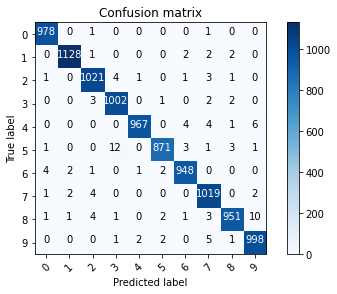

In [7]:
# Plot confusion matrix (Following code from https://colab.research.google.com/drive/161SaEMssCa8vQUZQjIsIynjVqBsKzG7P)
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

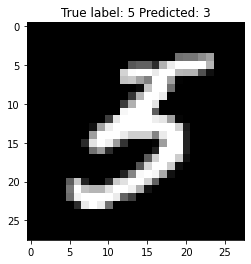

In [11]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));